# This Notebook intends to find whether the LLM can make reasonable decisions in finance market

## Data chosen for test

1. Choose 

## how to test

## Results and Conclusions

In [9]:
%load_ext autoreload
%autoreload 1

import sys
sys.path.append('./../app/')
%aimport room
%aimport prompt_generator, agents, schemas
from typing import List
import datetime
from prompt_generator import genrate_agent_predict_prompt_with_news_normal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
# plt.rcParams['font.sans-serif'] = ['/Users/zhejianzhang/.matplotlib/SimHei.ttf']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] 
fpath = matplotlib.get_cachedir()
print(fpath)
def display_buy_sell_attitude(belief_dict:dict, agent_name:str):
    buy_expects, sell_expects =[],[]
    dates = belief_dict.keys()
    for date, responses in belief_dict.items():
        print(date)
        # decisions = [item.decisions for item in responses]
        decisions=[]
        for item in responses:
            decisions += item.decisions
        buy_expect = sum([item.probability*item.percent for item in decisions if item.action == 'buy'])
        sell_expect = sum([item.probability*item.percent for item in decisions if item.action == 'sell'])
        buy_expects.append(buy_expect)
        sell_expects.append(sell_expect)
    # 画图
    bar_width = 0.35
    index = range(len(dates))

    fig, ax = plt.subplots()

    bar1 = ax.bar(index, buy_expects, bar_width, label='Buy', color='g')
    bar2 = ax.bar([i+bar_width for i in index], sell_expects, bar_width, label='Sell', color='r')

    ax.set_xlabel('Date')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Buy and Sell Decisions Over Time of {agent_name}')
    ax.set_xticks([i+bar_width/2 for i in index])
    ax.set_xticklabels(dates, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

async def predict_belief(code: str, start_date:datetime, end_date:datetime,trader:agents.BaseTraderAgent =  agents.BeginnerTrader()):
    final_result_dict = {}
    for i in range((end_date - start_date).days + 1):
        day = start_date + datetime.timedelta(days=i)
        predict_results = await predict_one_date(code, day, trader)
        final_result_dict[day] = predict_results
    return final_result_dict


async def predict_one_date(code,end_date:datetime, trader:agents.BaseTraderAgent):
    room_obj = room.Room(code=code,date=end_date)
    # trader = agents.SeniorTrader()
    trader.set_prompt_func(genrate_agent_predict_prompt_with_news_normal)
    trader.verbose=False
    trader.set_stock_infos(
        fundamental_info_prompt=room_obj.fundamental_info.to_prompt(),
        tech_info_prompt=room_obj.stock_tech_info.to_prompt(),
        news_info=room_obj.news_info
    )
    trader.set_price(room_obj.stock_tech_info.get_price_by_freq_and_index())
    return await trader.apredict_believes(temperature=0.2, n= 50)




/Users/zhejianzhang/.matplotlib


In [11]:
CODE = '002235'
trader = agents.BeginnerTrader()
start_date = datetime.datetime(2023,10,9,hour=9)
end_date = datetime.datetime(2023,10,13,hour=15)

### First time let GPT generate n decissions

100%|██████████| 1/1 [00:00<00:00,  8.20it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=60, percent=20.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell',

100%|██████████| 1/1 [00:00<00:00,  8.18it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', 

100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='bu

100%|██████████| 1/1 [00:00<00:00,  8.21it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', 

100%|██████████| 1/1 [00:00<00:00,  7.96it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', 

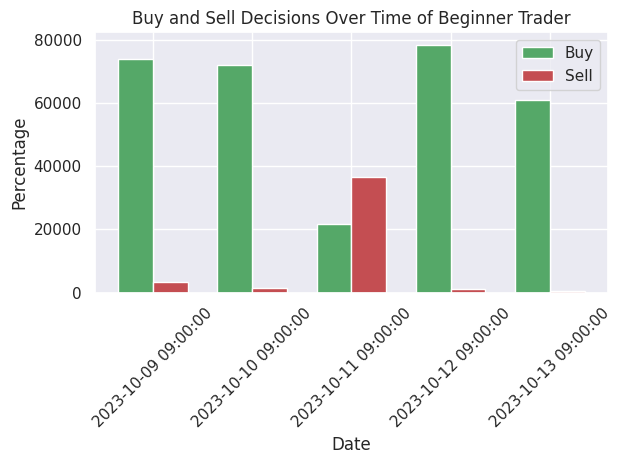

In [12]:
predicted_believes = await predict_belief(
    code=CODE, 
    start_date = start_date,
    end_date = end_date,
    trader=trader
    )
    
display_buy_sell_attitude(predicted_believes, trader.role.value)

### Second time let GPT generate n decissions to confirm

100%|██████████| 1/1 [00:00<00:00,  8.23it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=20.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', 

100%|██████████| 1/1 [00:00<00:00,  7.99it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=20, percent=20.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy',

100%|██████████| 1/1 [00:00<00:00,  7.53it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sel

100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', 

100%|██████████| 1/1 [00:00<00:00,  8.37it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=20, percent=20.0)]), ResponseAgent(risk_tolerance=1, investment_style='Active Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', 

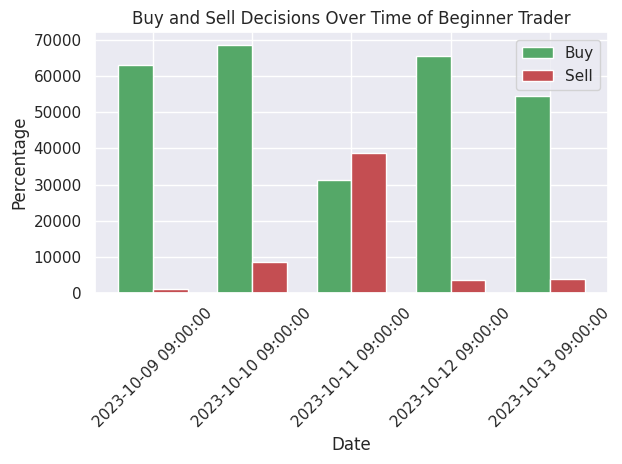

In [13]:
predicted_believes = await predict_belief(
    code=CODE, 
    start_date = start_date,
    end_date = end_date,
    trader=trader
)
display_buy_sell_attitude(predicted_believes, trader.role.value)

100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probab

100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=20.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=60, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probab

100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=20, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', proba

100%|██████████| 1/1 [00:00<00:00,  8.36it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probab

100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=10.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=30, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probab

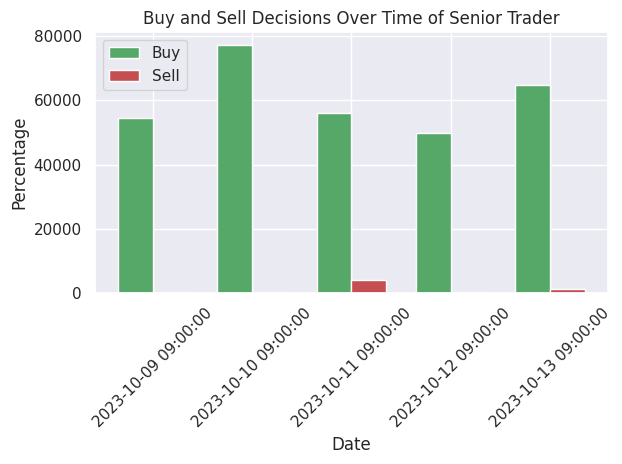

In [14]:
trader = agents.SeniorTrader()
predicted_believes = await predict_belief(
    code=CODE, 
    start_date = start_date,
    end_date = end_date,
    trader=trader
    )
    
display_buy_sell_attitude(predicted_believes, trader.role.value)

100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=70, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=70, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probab

100%|██████████| 1/1 [00:00<00:00,  7.84it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=100.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=70, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', proba

100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='sell', probability=80, percent=100.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', prob

100%|██████████| 1/1 [00:00<00:00,  7.79it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probab

100%|██████████| 1/1 [00:00<00:00,  7.61it/s]


[ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=70, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=50.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', probability=80, percent=100.0)]), ResponseAgent(risk_tolerance=1, investment_style='Value Investing', investment_aggressiveness='1', decisions=[AgentDecision(action='buy', proba

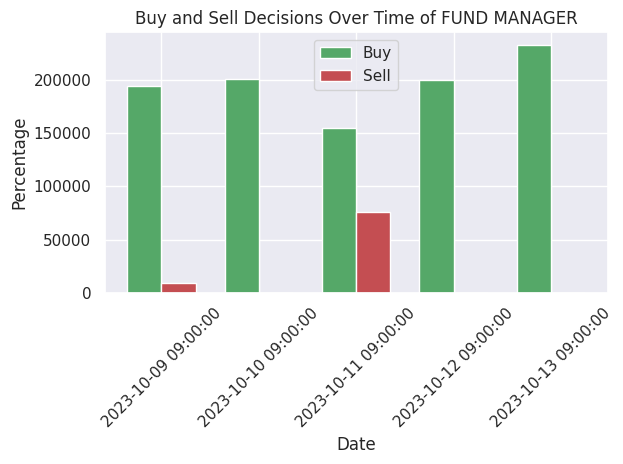

In [15]:
trader = agents.FundManager()
predicted_believes = await predict_belief(
    code=CODE, 
    start_date = start_date,
    end_date = end_date,
    trader=trader
    )
    
display_buy_sell_attitude(predicted_believes, trader.role.value)

In [16]:
# decisions = []
# for key in predicted_believes.keys():
#     print(key)
#     for item in (predicted_believes[key]):
#         print(item.decisions)
#         decisions.append(item.decisions)